In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import display, Markdown, Latex
import re

## seaborn
import seaborn as sns
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">
<font size="+2"><b>
The Importance of Resampling and Regularization
</b></font>
</div>

* [Ridge regression](#Ridge-regression)
* [Lasso regression](#Lasso-regression)
* [Advertising Example](#Advertising-Example)
    * [Linear Regression](#Linear-Regression)
    * [Ridge Regression](#Ridge-Regression)
    * [Lasso Regression](#Lasso-Regression)
    * [The comparison](#The-comparison)

Recall the [inear regression](https://hatefdastour.github.io/files/Statistical_Learning/Linear_Regression.html) The linear regression model is expressed as follows
$$Y= \beta_0 + \sum_{j=1}^{p}\beta_{j} X_{j},$$
where $X_j$ represents the j-th predictor and $\beta_j$ quantifies the association between that variable and the response.

The polynomial degree plays an important role in the model fitting. The polynomial degree can cause *overfitting* or *Underfitting*. Both underfit and overfit models cannot accurately present the data. Regularization methods can prevent overfitting/underfitting.


Let $n$ and $p$ represent the number of observations and the number of predictors, respectively. Now

* If $n>p$: the least squares estimates tend to have low variance and perform well.
* If $n\leq p$: then variance approaches infinite and the method is unusable.


The linear models can be improved by implementing other fitting procedures instead of least squares. In this article, we compare **ridge regression** and the **lasso regression** method with the linear regression.

## Ridge regression

This  regression equation can be expressed in matrix form as
$$Y = XB + ERR$$
where 
* $Y$: the dependent variable,
* $X$: the independent variables,
* $B$: the regression coefficients to be estimated,
* **ERR**: the errors are residuals.

Note that **Tikhonov regularization** known as **ridge regression** in statistics, and it is known as **weight decay** in machine learning.

## Lasso regression

minimization of function [[Source](https://en.wikipedia.org/wiki/Lasso_(statistics))],

$$\min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}+\lambda \sum _{j=1}^{p}\vartheta (\beta _{j}^{2})\right\},$$

where 
* $\vartheta (\gamma )$ is an arbitrary concave monotonically increasing function (for example, $ \vartheta (\gamma )={\sqrt {\gamma }}$ gives the lasso penalty,
* $ \vartheta (\gamma )=\gamma ^{1/4}$ gives the $ \ell ^{1/2}$ penalty).

## Advertising Example

Consider the advertising example from *[An Introduction to Statistical Learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7)*.

In [2]:
df = pd.read_csv('Data/Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


First, let plot the data.

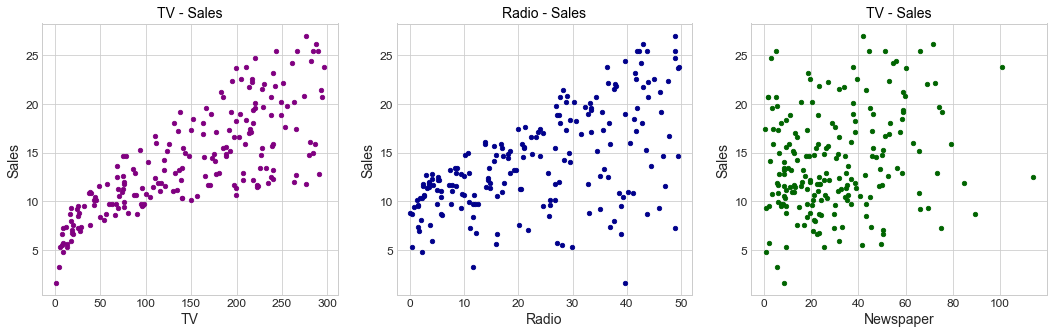

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=False)
_ = ax[0].set_title('TV - Sales', fontsize = 14);
_ = df.plot(ax=ax[0],x ='TV', y='Sales', kind = 'scatter', c='Purple')
_ = ax[1].set_title('Radio - Sales', fontsize = 14);
_ = df.plot(ax=ax[1],x ='Radio', y='Sales', kind = 'scatter', c='DarkBlue')
_ = ax[2].set_title('TV - Sales', fontsize = 14);
_ = df.plot(ax=ax[2],x ='Newspaper', y='Sales', kind = 'scatter', c='DarkGreen')

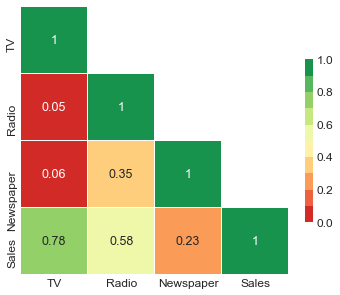

In [4]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr().round(2)
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdYlGn", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, annot_kws={"size": 12.5},
                cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()

Correlation_Plot (df, 6)

We can see that the correlation between radio and newspaper is about $0.35$. In other words, we can see a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising.

## Train and Test Sets

In [5]:
X = df.drop(columns = 'Sales')
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
               'Shape':[X_train.shape, X_test.shape, y_train.shape, y_test.shape]}).set_index('Set').T

Set,X_train,X_test,y_train,y_test
Shape,"(140, 3)","(60, 3)","(140,)","(60,)"


In [6]:
def Accuracy_Table(clf, X_test = X_test, y_test = y_test):
    Text = re.sub(r"(\w)([A-Z])", r"\1 \2", re.split('[()]', str(clf))[0])
    Out = pd.DataFrame({'MSE': [-cross_val_score(clf, X_train, y_train, scoring='neg_mean_squared_error', cv=10).mean()],
                        'R2': [cross_val_score(clf, X_train, y_train, scoring='r2', cv=10).mean()]}, index = [Text])
    return Out

## Linear Regression

In [7]:
lr = LinearRegression()
_ = lr.fit(X_train, y_train)
Accuracy_Table(lr)

,MSE,R2
Linear Regression,2.762389,0.874688


## Ridge Regression 

In [8]:
params={'alpha':np.concatenate((10.**(np.arange(-15,1,2)),10*np.arange(0.,3.,1)), axis=0, out=None)}
ridge = GridSearchCV(Ridge(), params, scoring='neg_mean_squared_error',cv=10)
_ = ridge.fit(X_train, y_train)

display(Latex(r'Best Parameters: $\alpha$ = %.4f' % ridge.best_params_['alpha']))
ridge = Ridge(alpha=ridge.best_params_['alpha'])
_ = ridge.fit(X_train, y_train)
Accuracy_Table(clf = ridge)

<IPython.core.display.Latex object>

,MSE,R2
Ridge,2.762309,0.8747


## Lasso Regression

In [ ]:
lasso=GridSearchCV(Lasso(), params, scoring='neg_mean_squared_error',cv=10)
_ = lasso.fit(X_train, y_train)
Accuracy_Table(lasso)

display(Latex(r'Best Parameters: $\alpha$ = %.4f' % lasso.best_params_['alpha']))

lasso = Lasso(alpha=lasso.best_params_['alpha'])
_ = lasso.fit(X_train, y_train)
Accuracy_Table(clf = lasso)

## Comparison

We can see that resampling and regularization can improve the fitting accuracy. However, given the simple nature of this example, the improvements are not significant.

***